<h1>Aplicación de Algoritmos de Agrupamiento para el Análisis de Países: K-Medias, Métodos Alternativos y Mapas Autoorganizados</h1>
<ol>
    <li>
        Aplica el algoritmo de <strong>k-medias</strong> sobre el conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos, e indica qué número de grupos consideras que es el adecuado. Justifica tu respuesta.
    </li>
    <li>
        <strong>Repita lo anterior</strong>, pero con tres métodos de agrupamiento que elijas. Toma en cuenta que no para todos los métodos de agrupamiento se pueden utilizar los métodos vistos en clase para calcular el número óptimo de grupos.
    </li>
    <li>
        <strong>Investiga</strong> qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son: <a href="https://minosom.example.com">Minosom</a> y <a href="https://sklearn-som.example.com">sklearn-som</a>. Para este ejercicio, los grupos se tienen que ver en la representación gráfica del mapa autoorganizado, y debes dar una interpretación a dicha representación gráfica.
    </li>
    <li>
        De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algún patrón que esperabas, o tienen información nueva que no hayas considerado anteriormente.
    </li>
</ol>



In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from minisom import MiniSom
from sklearn_som.som import SOM


# Metrics for evaluating clustering results

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Distance metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [247]:
dataframe=pd.read_csv('data\country_data.csv')
dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [248]:
scaler=MinMaxScaler()
x=scaler.fit_transform(dataframe.drop('country',axis=1))
x

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

<h3>1. Aplica el algoritmo de <strong>k-medias</strong> sobre el conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos, e indica qué número de grupos consideras que es el adecuado. Justifica tu respuesta.</h3>

In [249]:
####### Helper function for plotting #######
def plot_data(points, labels, title):   
    fig = plt.figure()
    if points.shape[1] > 2:    
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:    
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')    
        plt.title(title)

    plt.show()

----- K-means -----
Labels:  [6 0 3 6 8 0 3 2 2 3 0 8 3 0 8 2 3 6 3 3 0 1 0 4 8 6 6 3 6 2 3 6 6 0 0 0 9
 6 9 0 6 0 8 8 2 3 0 3 0 6 9 8 3 2 2 9 9 0 2 9 2 3 3 6 6 3 6 8 2 3 3 0 9 2
 2 2 3 2 3 3 9 1 4 3 9 8 8 1 1 8 8 5 0 9 6 8 8 6 5 9 8 1 0 3 0 3 6 3 1 3 2
 2 6 7 2 4 9 8 3 3 3 0 2 4 0 0 1 3 4 9 0 8 6 5 8 8 1 1 8 2 3 3 9 3 2 2 3 9
 8 9 6 3 8 0 3 6 0 4 2 2 0 3 3 3 8 9 6]
Centers:  [[0.0526777  0.15379882 0.3842138  0.22207319 0.10842103 0.09885556
  0.84812623 0.0992429  0.07877712]
 [0.28248404 0.15320516 0.51916304 0.38616599 0.03533571 0.08325376
  0.52772299 0.40466176 0.02592052]
 [0.00825537 0.20321793 0.54092469 0.2195195  0.31880295 0.05124215
  0.96235314 0.1042381  0.43129543]
 [0.14200789 0.17431171 0.19763828 0.25028561 0.05706285 0.12779269
  0.75957646 0.25182633 0.03280751]
 [0.04113924 0.32413165 0.07395898 0.21042893 0.57003856 0.16240027
  0.88724523 0.18270242 0.3441126 ]
 [0.00746511 0.87993456 0.30971618 0.9003454  0.5098788  0.06171334
  0.97304405 0.0362776  0.5472579

C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


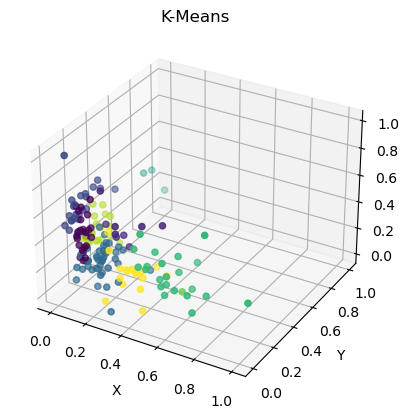

In [250]:
####### K-means #######
print('----- K-means -----')

kmeans = KMeans(n_clusters=10).fit(x)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(x, clustering_labels, 'K-Means')

In [251]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def get_optimal_number_of_clusters(x, SkModel=None):
    # Check if the SkModel (clustering model) is provided
    if SkModel is None:
        raise ValueError("You must provide a clustering model (e.g., KMeans).")
    
    # Fit the clustering model to the data
    model = SkModel
    model.fit(x)
    
    # Initialize all metrics to None
    sum_of_squared_distances = None
    sscore = None
    chscore = None
    dbscore = None
    
    # Try to calculate each metric individually
    try:
        sum_of_squared_distances = model.inertia_  # Sum of squared distances (inertia)
    except Exception as e:
        print(f"Error calculating inertia (sum of squared distances): {e}")
    
    try:
        sscore = silhouette_score(x, model.labels_)  # Silhouette score
    except Exception as e:
        print(f"Error calculating Silhouette score: {e}")
    
    try:
        chscore = calinski_harabasz_score(x, model.labels_)  # Calinski-Harabasz index
    except Exception as e:
        print(f"Error calculating Calinski-Harabasz index: {e}")
    
    try:
        dbscore = davies_bouldin_score(x, model.labels_)  # Davies-Bouldin index
    except Exception as e:
        print(f"Error calculating Davies-Bouldin index: {e}")
    
    # Return all calculated metrics (None for any that failed)
    return sum_of_squared_distances, sscore, chscore, dbscore


In [252]:
def plot_methods(ks,sum_of_squared_distances,sscore, chscore, dbscore):
    
    fig, axs = plt.subplots(2, 2,figsize=(12, 10))
        
    axs[0][0].plot(ks, sum_of_squared_distances)
    axs[0][0].set_xlabel('Number of clusters')
    axs[0][0].set_ylabel('Sum of squared distances (lower is better)')    
    axs[0][0].set_title('Elbow method')
    axs[0][0].set_xticks(ks)
    
    axs[0][1].plot(ks, sscore)
    axs[0][1].set_xlabel('Number of clusters')
    axs[0][1].set_ylabel('Score (greater is better)')    
    axs[0][1].set_title('Silhouette Coefficient')    
    axs[0][1].set_xticks(ks)
    
    axs[1][0].plot(ks, chscore)
    axs[1][0].set_xlabel('Number of clusters')
    axs[1][0].set_ylabel('Score (greater is better)')    
    axs[1][0].set_title('Calinski-Harabasz index')    
    axs[1][0].set_xticks(ks)
    
    axs[1][1].plot(ks, dbscore)
    axs[1][1].set_xlabel('Number of clusters')
    axs[1][1].set_ylabel('Score (lower is better)')    
    axs[1][1].set_title('Davies-Bouldin index')    
    axs[1][1].set_xticks(ks)
    
    plt.show()

In [253]:
def get_optimal_number_of_clusters_results(model):
    arr_sum_of_squared_distances=[]
    arr_sscore=[]
    arr_chscore=[]
    arr_dbscore=[]
    
    ks = np.arange(2, 21)
    for k in ks:
        sum_of_squared_distances, sscore, chscore, dbscore=get_optimal_number_of_clusters(x,model(n_clusters=k))
        arr_sum_of_squared_distances.append(sum_of_squared_distances)
        arr_sscore.append(sscore)
        arr_chscore.append(chscore)
        arr_dbscore.append(dbscore)
    plot_methods(ks,arr_sum_of_squared_distances, arr_sscore, arr_chscore, arr_dbscore)


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

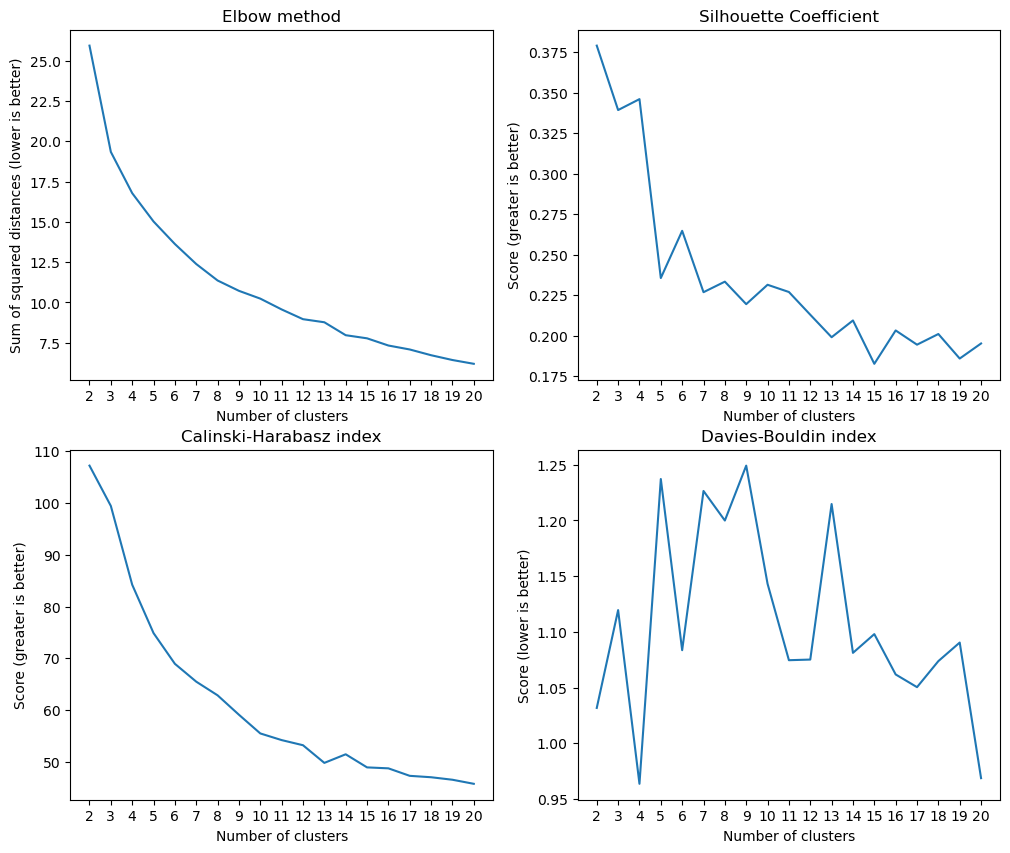

In [254]:
get_optimal_number_of_clusters_results(KMeans)

<h3>2. Repita lo anterior, pero con tres métodos de agrupamiento que elijas. Toma en cuenta que no para todos los métodos de agrupamiento se pueden utilizar los métodos vistos en clase para calcular el número óptimo de grupos.</h3>

<h3>2.1 Aglomerative clustering</h3>

----- Aglomerative clustering -----
Labels:  [1 0 0 1 0 0 0 2 2 0 0 2 0 0 0 2 0 1 0 0 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 0 2
 2 2 0 2 0 0 1 0 2 0 1 0 0 0 0 2 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 1 0 0 2
 2 1 1 2 2 1 0 0 0 0 0 2 2 0 0 0 0 2 1 0 0 1 3 0 0 0 0 0 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 1 1 0 2 2 2 0 0 0 0 0 1 1]


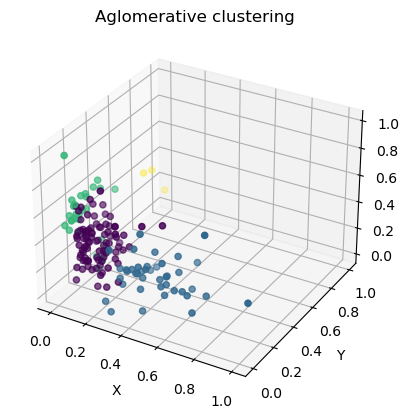

Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


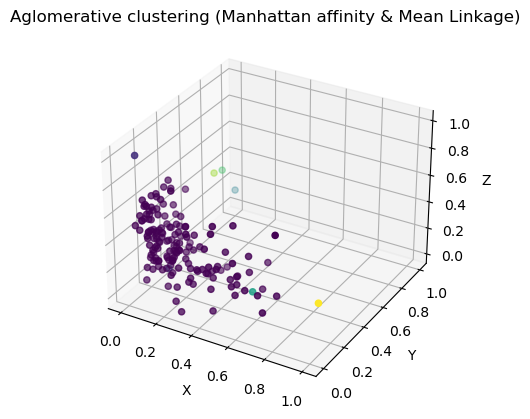

Labels:  [3 1 1 3 1 1 1 7 7 1 1 1 1 1 1 7 1 3 1 1 1 3 1 1 1 3 3 1 3 7 1 3 3 1 1 1 3
 3 3 1 3 1 1 1 7 1 1 1 1 3 3 1 1 7 7 1 3 1 7 3 7 1 1 3 3 1 4 1 7 1 1 1 3 7
 7 7 1 7 1 1 3 3 1 1 3 1 1 3 3 1 1 6 1 3 3 1 1 3 0 3 1 3 1 1 1 1 3 1 3 1 7
 7 3 5 7 1 3 1 1 1 1 1 7 2 1 1 3 1 1 3 1 1 3 0 1 1 3 3 1 7 1 1 3 1 7 7 1 3
 1 3 3 1 1 1 1 3 1 1 7 7 1 1 1 1 1 3 3]


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


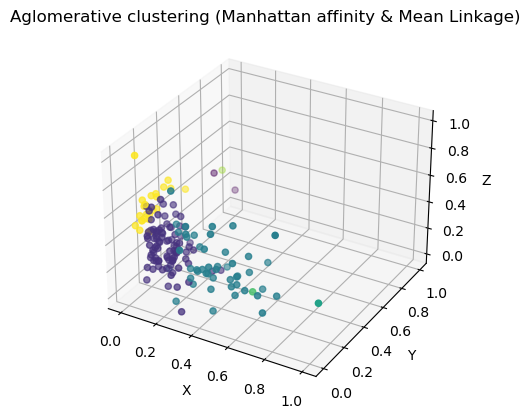

C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Labels:  [3 1 1 3 1 1 1 7 7 1 1 1 1 1 1 7 1 3 1 1 1 3 1 1 1 3 3 1 3 7 1 3 3 1 1 1 3
 3 3 1 3 1 1 1 7 1 1 1 1 3 3 1 1 7 7 1 3 1 7 3 7 1 1 3 3 1 4 1 7 1 1 1 3 7
 7 7 1 7 1 1 3 3 1 1 3 1 1 3 3 1 1 6 1 3 3 1 1 3 0 3 1 3 1 1 1 1 3 1 3 1 7
 7 3 5 7 1 3 1 1 1 1 1 7 2 1 1 3 1 1 3 1 1 3 0 1 1 3 3 1 7 1 1 3 1 7 7 1 3
 1 3 3 1 1 1 1 3 1 1 7 7 1 1 1 1 1 3 3]


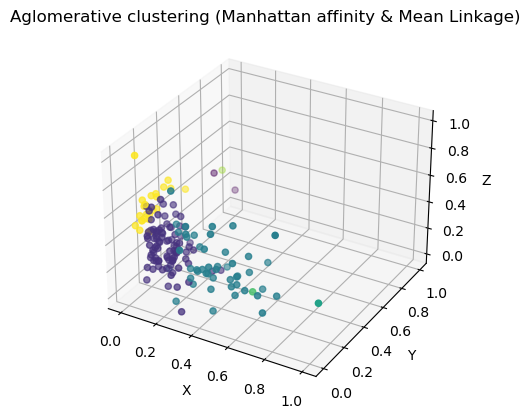

In [255]:
####### Aglomerative clustering #######
print('----- Aglomerative clustering -----')
agl = AgglomerativeClustering(n_clusters=4).fit(x)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Aglomerative clustering')

# Aglomerative clustering with single linkage
agl = AgglomerativeClustering(n_clusters=8, linkage = 'single').fit(x)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

# Aglomerative clustering with manhattan distance and mean linkage
agl = AgglomerativeClustering(n_clusters=8, linkage = 'average', affinity = 'manhattan').fit(x)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

# Using custom distance matrix
dist = pairwise_distances(x, metric = 'l1')
agl = AgglomerativeClustering(n_clusters=8, linkage = 'average', affinity = 'precomputed').fit(dist)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'AgglomerativeClustering' 

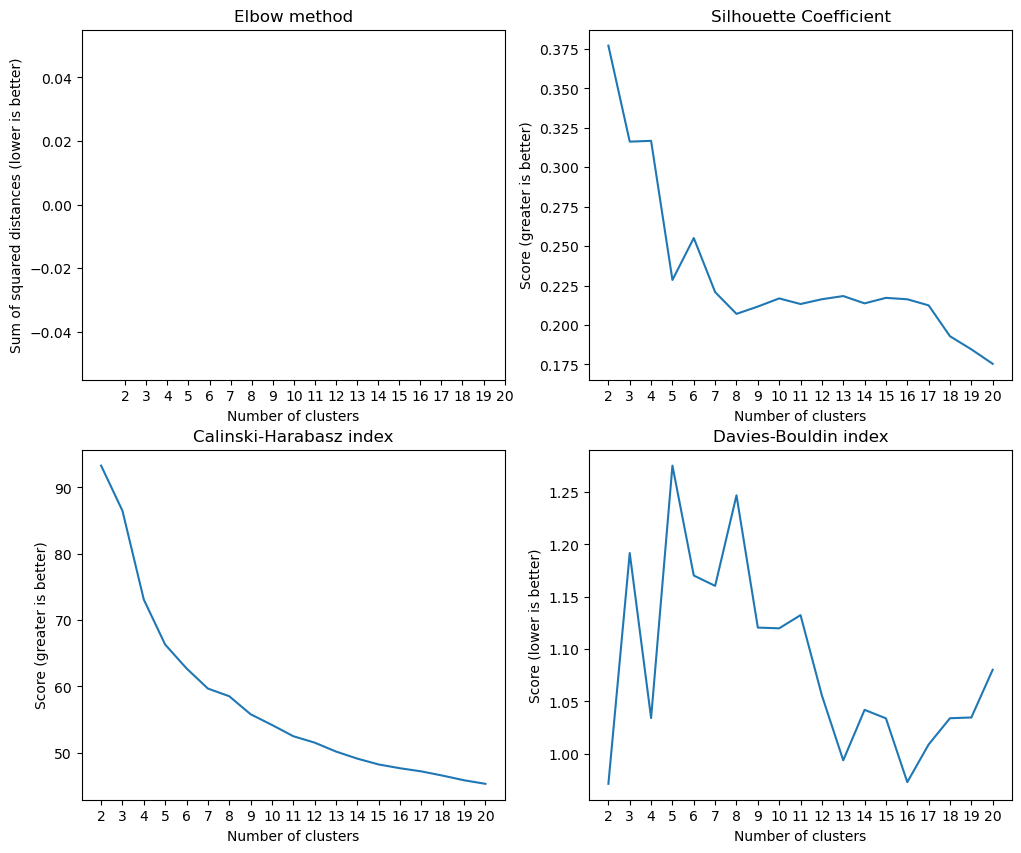

In [256]:
get_optimal_number_of_clusters_results(AgglomerativeClustering)


<h3>2.1 OPTICS</h3>

----- OPTICS -----
Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


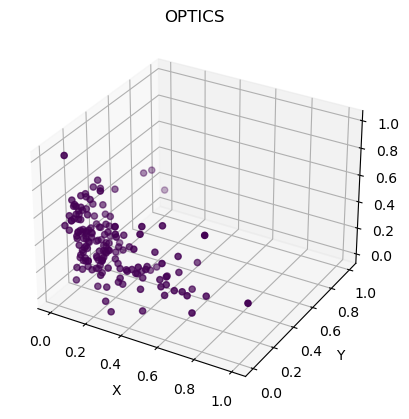

In [257]:
####### OPTICS #######
print('----- OPTICS -----')
optics = OPTICS(min_samples = 20).fit(x)
clustering_labels = optics.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'OPTICS')

Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'OPTICS' object has no attribute 'inertia_'
Error calculating in

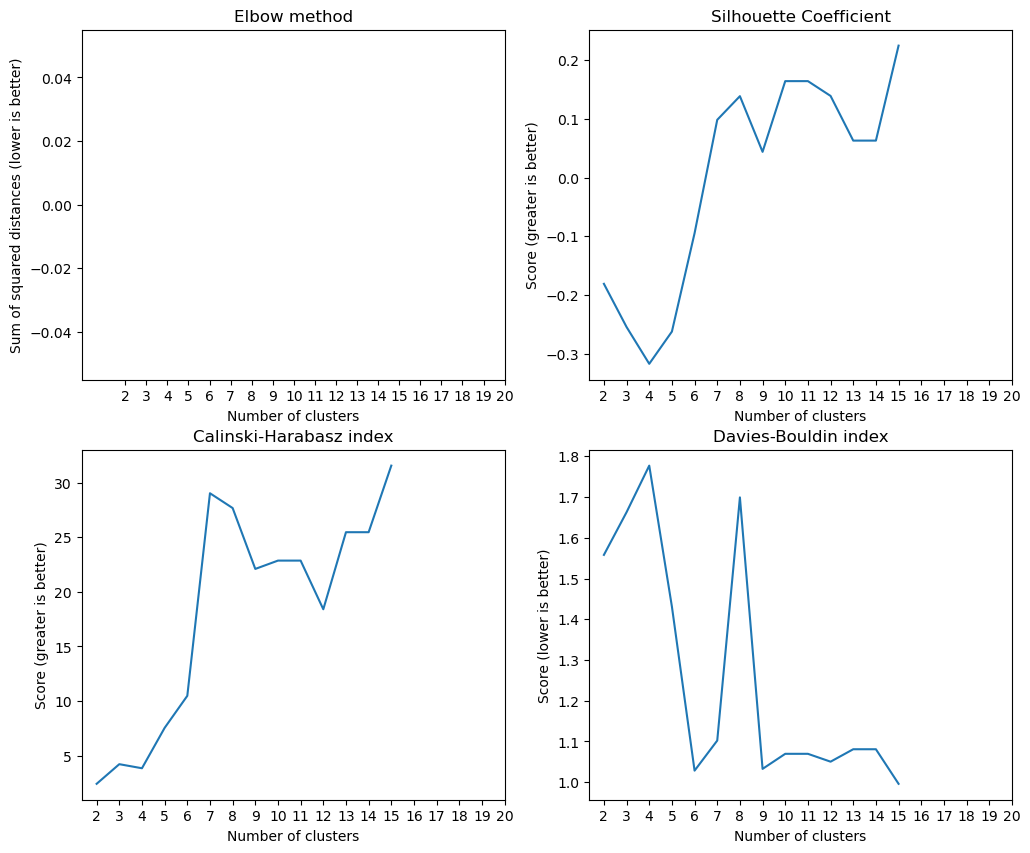

In [258]:
arr_sum_of_squared_distances=[]
arr_sscore=[]
arr_chscore=[]
arr_dbscore=[]

ks = np.arange(2, 21)
for k in ks:
    sum_of_squared_distances, sscore, chscore, dbscore=get_optimal_number_of_clusters(x,OPTICS(min_samples=k))
    arr_sum_of_squared_distances.append(sum_of_squared_distances)
    arr_sscore.append(sscore)
    arr_chscore.append(chscore)
    arr_dbscore.append(dbscore)
plot_methods(ks,arr_sum_of_squared_distances, arr_sscore, arr_chscore, arr_dbscore)


<h3>2.3 Spectral clustering</h3>

----- Spectral clustering -----
Labels:  [1 0 0 1 0 0 0 3 3 0 0 0 0 4 4 3 0 1 4 0 4 4 0 3 4 1 1 4 1 3 0 1 1 0 0 0 1
 1 0 4 1 0 0 4 3 0 0 0 0 1 0 4 4 3 3 0 1 4 3 0 3 0 0 1 1 4 1 4 3 0 0 0 0 4
 3 3 0 3 4 0 0 4 3 4 0 4 4 4 1 0 4 2 4 0 1 4 4 1 4 1 4 4 4 0 4 0 1 0 4 0 3
 3 1 1 3 0 0 4 0 0 0 0 3 3 0 0 1 0 0 1 4 4 1 2 4 4 4 4 0 3 0 0 1 0 3 3 0 1
 0 1 1 0 4 0 0 1 4 0 3 3 0 0 0 0 4 0 1]


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


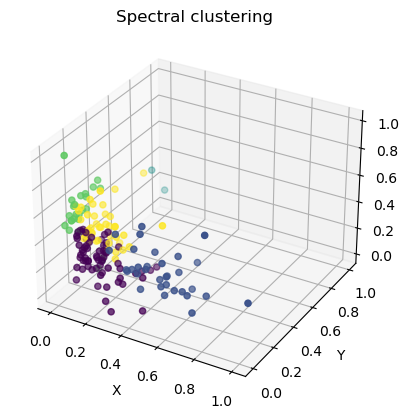

C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels:  [2 0 4 2 0 0 0 3 3 4 0 0 4 0 0 3 0 2 4 4 0 4 0 0 0 2 2 4 2 3 4 2 2 0 0 0 4
 2 4 0 2 0 0 0 3 4 4 4 0 2 4 0 4 3 3 4 2 0 3 4 3 0 4 2 2 4 2 0 3 4 4 0 4 3
 0 3 0 3 0 4 4 4 0 4 4 0 0 2 2 0 0 1 0 4 2 0 0 2 0 4 0 4 0 4 0 4 2 4 4 4 3
 3 2 2 3 0 4 0 0 4 4 0 0 3 0 0 4 4 0 4 0 0 2 1 0 0 4 4 0 3 4 0 4 0 3 3 4 2
 0 4 2 4 0 0 4 2 0 0 3 3 0 4 4 4 0 4 2]


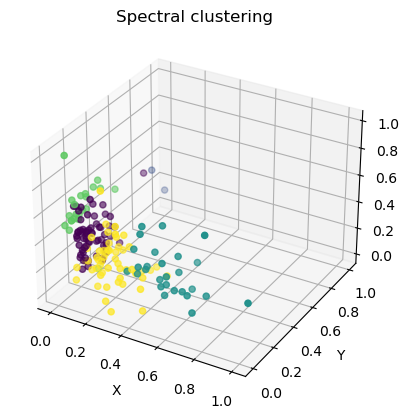

In [259]:
####### Spectral clustering #######
print('----- Spectral clustering -----')
spectral = SpectralClustering(n_clusters=5).fit(x)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Spectral clustering')

# Using custom affinity matrix
dist = pairwise_distances(x, metric = 'manhattan')
similarity = np.exp(- dist ** 2)

spectral = SpectralClustering(n_clusters=5, affinity = 'precomputed').fit(similarity)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Spectral clustering')

Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'
Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


C:\Users\carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Error calculating inertia (sum of squared distances): 'SpectralClustering' object has no attribute 'inertia_'


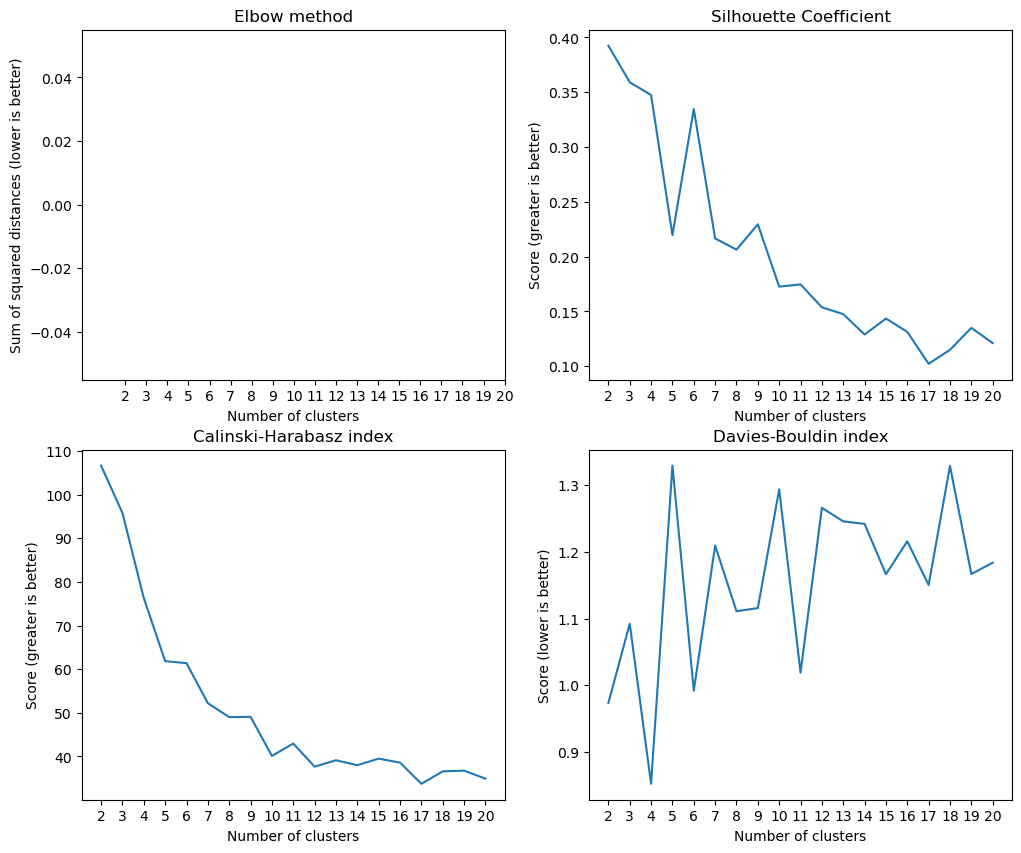

In [260]:
get_optimal_number_of_clusters_results(SpectralClustering)

<h3>3. qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son: <a href="https://minosom.example.com">Minosom</a> y <a href="https://sklearn-som.example.com">sklearn-som</a>. Para este ejercicio, los grupos se tienen que ver en la representación gráfica del mapa autoorganizado, y debes dar una interpretación a dicha representación gráfica.</h3>

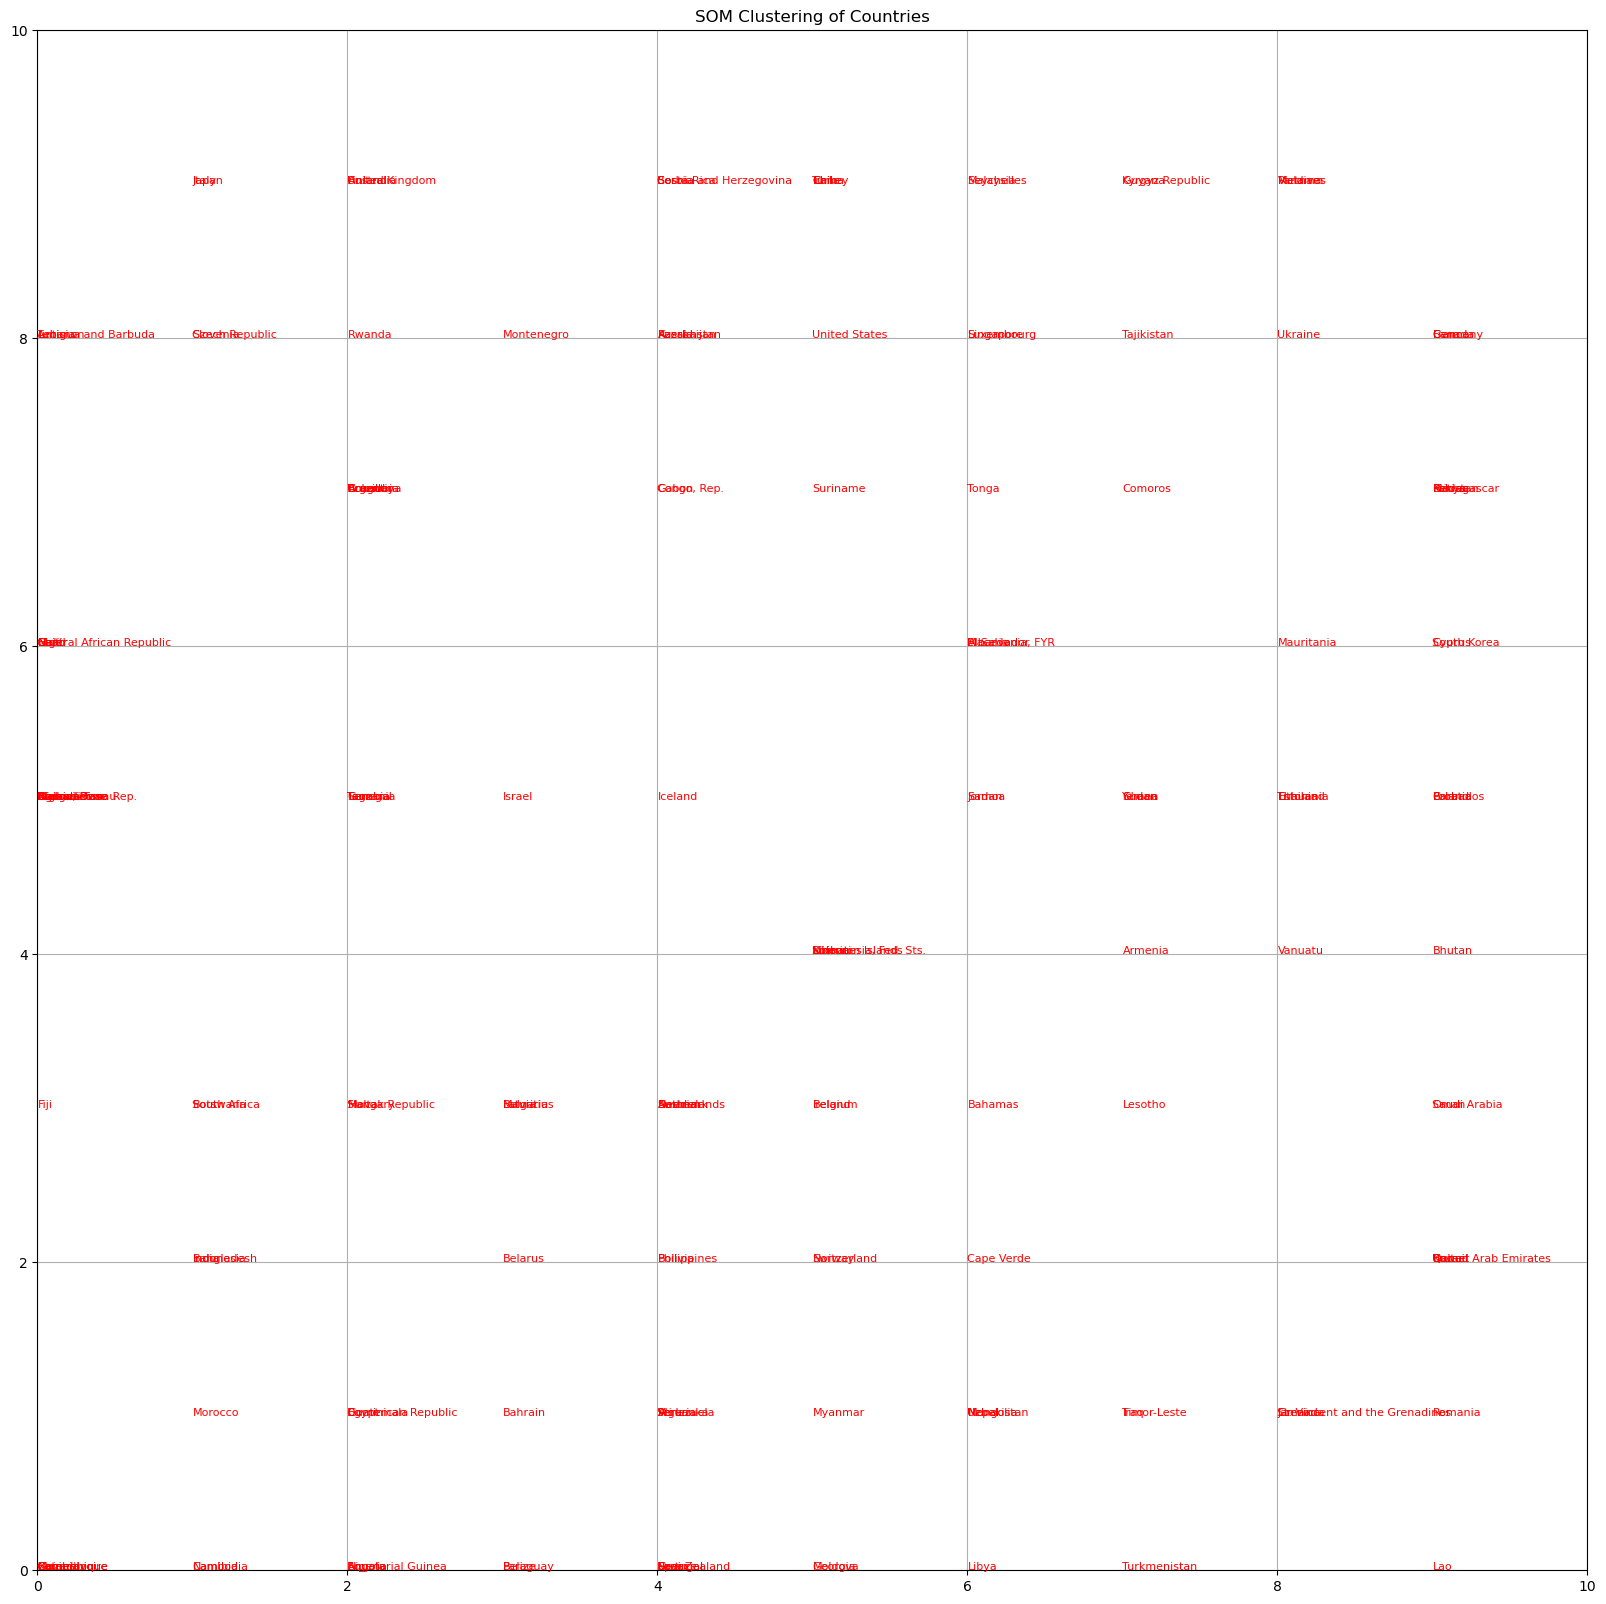

In [261]:
# Initialize and train the SOM
som = MiniSom(x=10, y=10, input_len=x.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(x)
som.train_random(x, num_iteration=100)  # Training with 100 iterations

# Plotting the results
plt.figure(figsize=(20, 20))
for i, row in dataframe.iterrows():
    w = som.winner(x[i])  # Getting the winning node for each data point
    plt.text(w[0], w[1], row['country'], color='red', fontdict={'size': 8})

plt.title("SOM Clustering of Countries")
plt.xlim([0, som.get_weights().shape[0]])
plt.ylim([0, som.get_weights().shape[1]])
plt.grid()
plt.show()

<h3>4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algún patrón que esperabas, o tienen información nueva que no hayas considerado anteriormente.</h3>

<ol>
  <li><strong>Spectral Clustering:</strong>
    <ul>
      <li>Los grupos están dispersos con una concentración en la esquina inferior izquierda. Hay solapamiento entre algunos puntos, lo que indica que los clústeres no están claramente separados.</li>
    </ul>
  </li>
  <li><strong>K-Means:</strong>
    <ul>
      <li>Los puntos también se agrupan densamente en el lado izquierdo, pero con mayor dispersión. La separación es algo más clara que en Spectral Clustering, aunque persiste cierta superposición.</li>
    </ul>
  </li>
  <li><strong>Aglomerative Clustering (Manhattan affinity & Mean Linkage):</strong>
    <ul>
      <li>Este método forma grupos más compactos y mejor separados. Aparecen subgrupos más pequeños y definidos, capturando mejor la estructura jerárquica.</li>
    </ul>
  </li>
</ol>
